# Exploratory Data Analysis of Sales.csv

## 1) Loading the libraries and the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import grafici
from dython.nominal import associations
import numpy as np

In [2]:
# read the data
sales = pd.read_csv('Cleaned_Data/sales.csv')

# dataset to merge
cars = pd.read_csv('Cleaned_Data/cars.csv')
users = pd.read_csv('Cleaned_Data/users.csv')

## 2) Preparing the data

In [3]:
# merge the cars
sales = pd.merge(sales, cars, on='car_id', how='left')

# merge the users
sales = pd.merge(sales, users, on='customer_id', how='left')

In [4]:
# check duplicates
print('Duplicates:', sales.duplicated().sum())

Duplicates: 0


In [5]:
# reset the index
sales.reset_index(drop=True, inplace=True)

In [6]:
# convert the date to datetime
sales['purchase_date'] = pd.to_datetime(sales['purchase_date'])
sales['release_date'] = pd.to_datetime(sales['release_date'])

In [7]:
# nans
sales.isnull().sum()

transaction_id         0
customer_id            0
car_id                 0
platform               0
purchase_date          0
purchase_price         0
user_review        65070
car_model              0
fuel_type              0
release_date           0
price                  0
user_first_name       21
user_last_name        11
gender                 0
email                 14
dtype: int64

In [8]:
# shape
sales.shape

(74780, 15)

### 2.1) Associations

In [9]:
# copy the dataset
sales_dython = sales.copy()

In [10]:
# print all the column that have id in the name
id_columns = [col for col in sales_dython.columns if '_id' in col]
print("We are dropping the following columns:", id_columns)

# drop the id columns
sales_dython.drop(columns=id_columns, inplace=True)

We are dropping the following columns: ['transaction_id', 'customer_id', 'car_id']


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\dython\nominal.py:632: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  lambda col: col.view(np.int64), axis=0


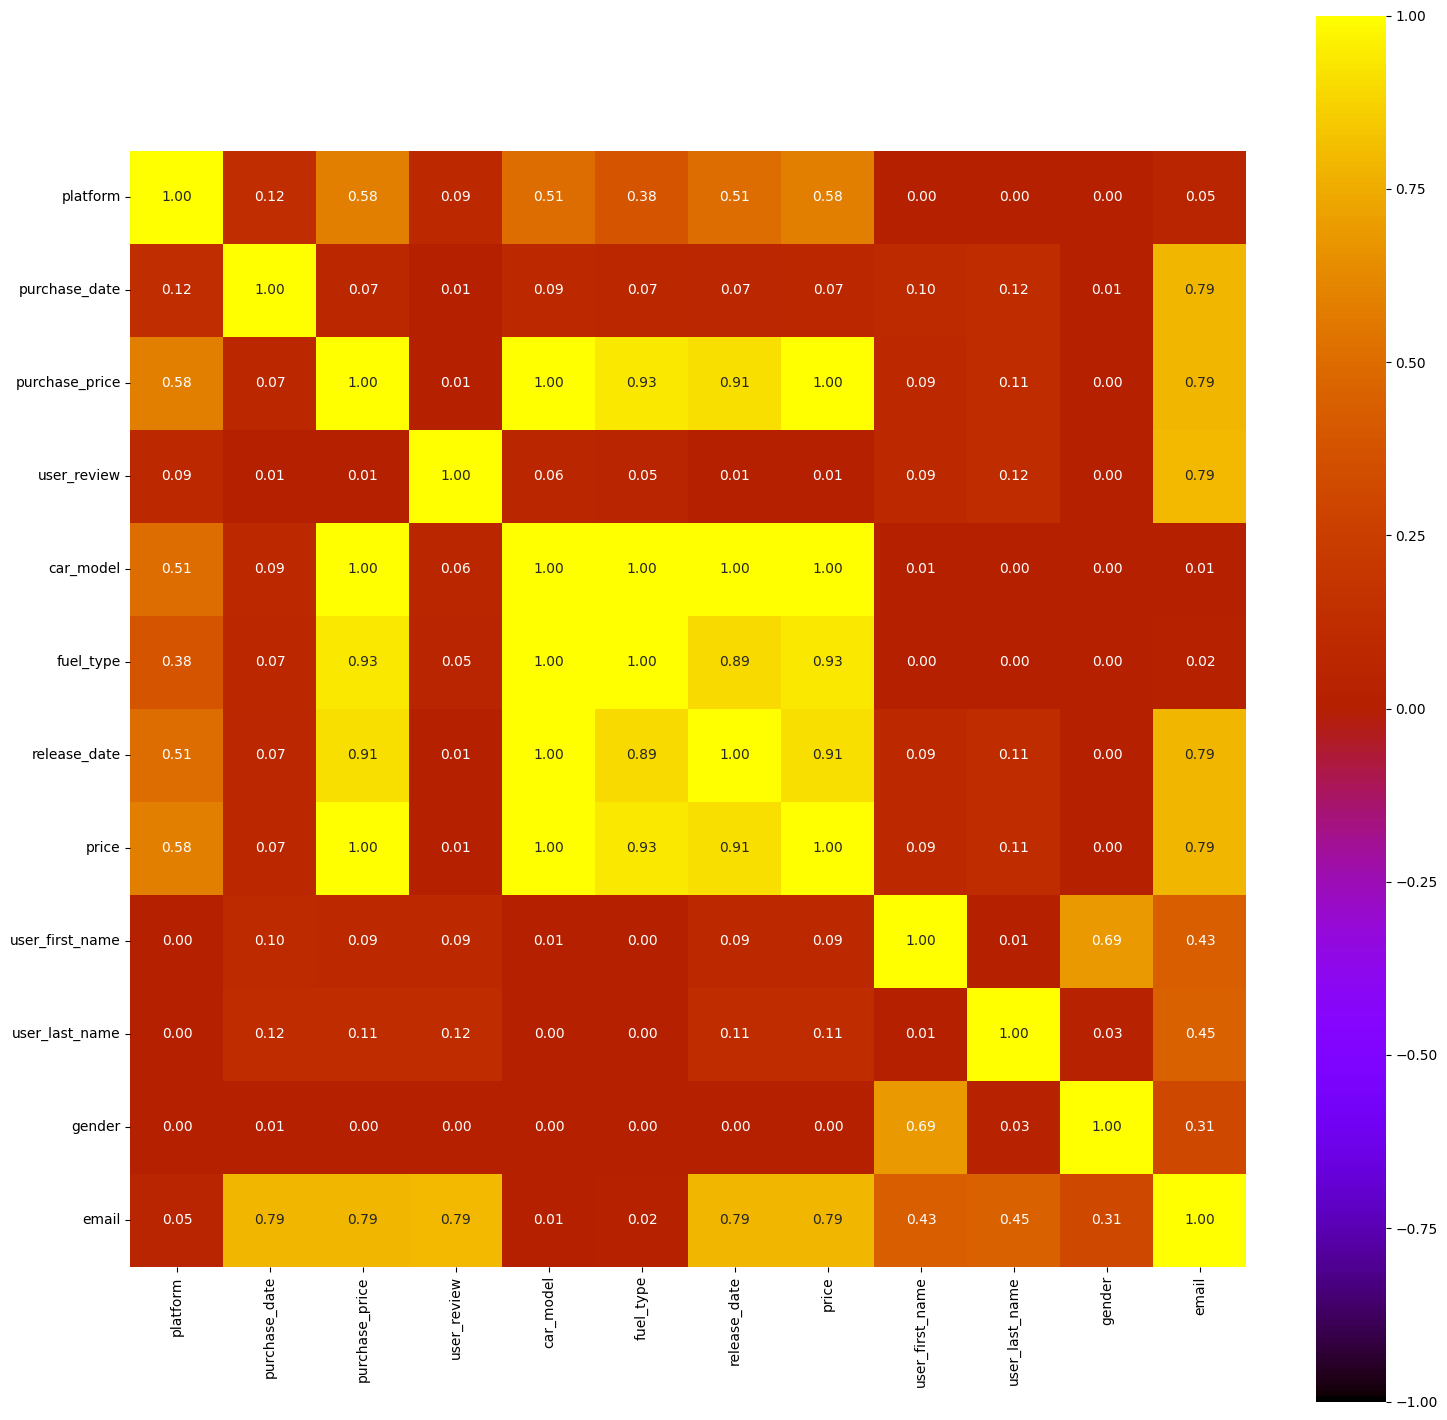

In [11]:
# Generate the correlation matrix
associations_sales = associations(sales_dython, multiprocessing=True, cmap='gnuplot',num_num_assoc='spearman')

It is nice to see that the gender dosen't affect the dataset

## 3) Analyse all columns one by one

In [12]:
sales.dtypes

transaction_id             object
customer_id                object
car_id                     object
platform                   object
purchase_date      datetime64[ns]
purchase_price            float64
user_review               float64
car_model                  object
fuel_type                  object
release_date       datetime64[ns]
price                       int64
user_first_name            object
user_last_name             object
gender                     object
email                      object
dtype: object

### Platform column

<Axes: xlabel='platform'>

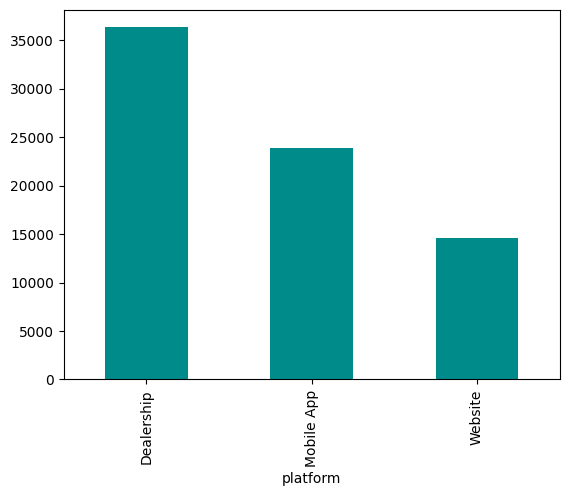

In [13]:
# plot the platform distribution
sales['platform'].value_counts().plot(kind='bar', color='darkcyan')

#### Platform correlation with other columns

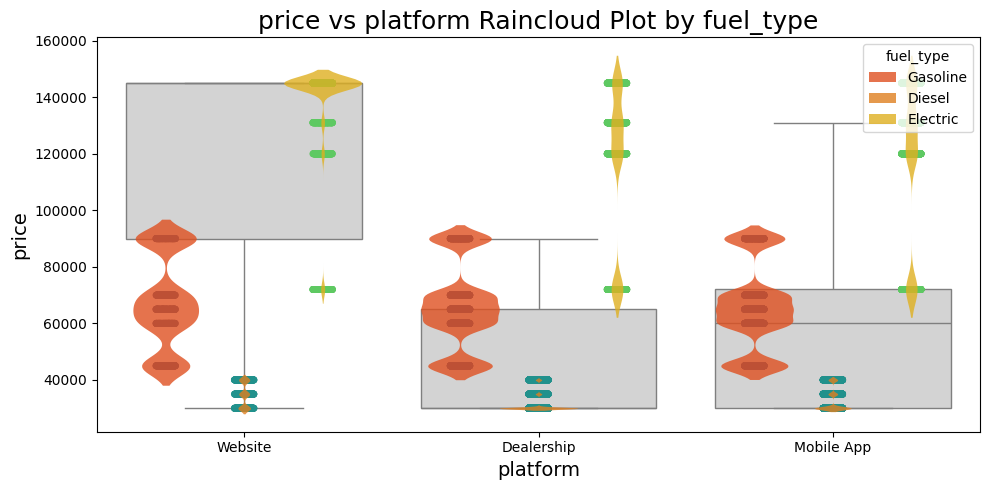

In [14]:
grafici.raincloud_plot(sales, 'price', 'platform', 'fuel_type', figsize=(10,5))

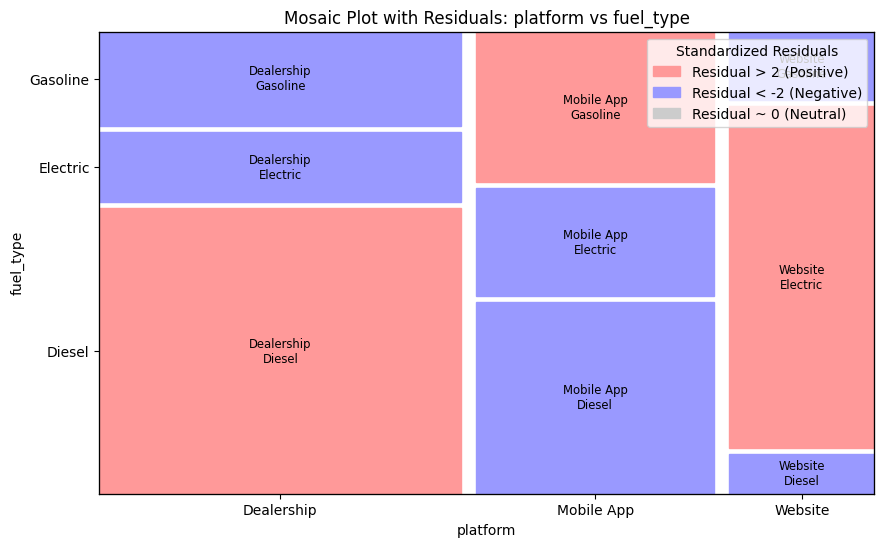

Chi-square Test Residuals:
fuel_type      Diesel    Electric   Gasoline
platform                                    
Dealership  48.400082  -49.874206 -11.405478
Mobile App  -8.040902  -17.289522  30.583881
Website    -66.129487  100.925835 -21.189960


In [15]:
grafici.create_mosaic_plot_with_legend(sales, ['platform', 'fuel_type'])

We can see that the Dealership sells more Diesel, the App sells more Gasoline and the Website sells more Electric cars

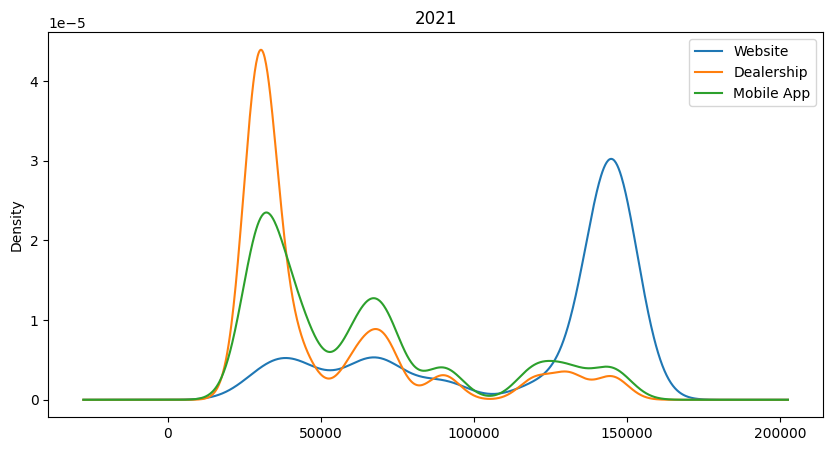

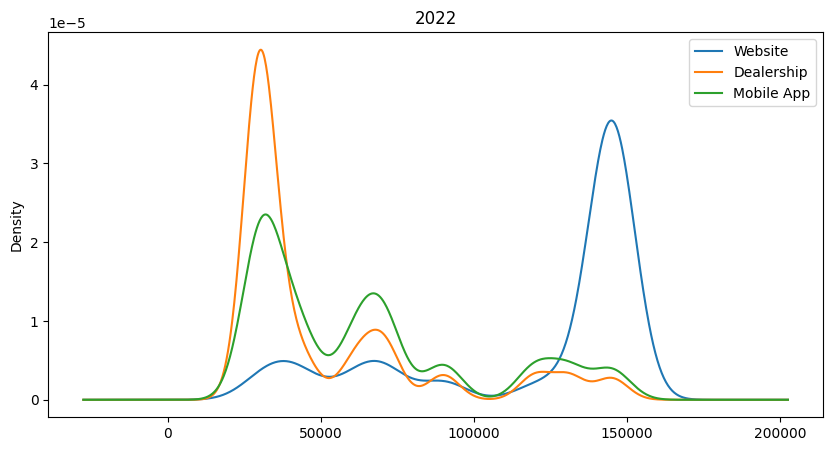

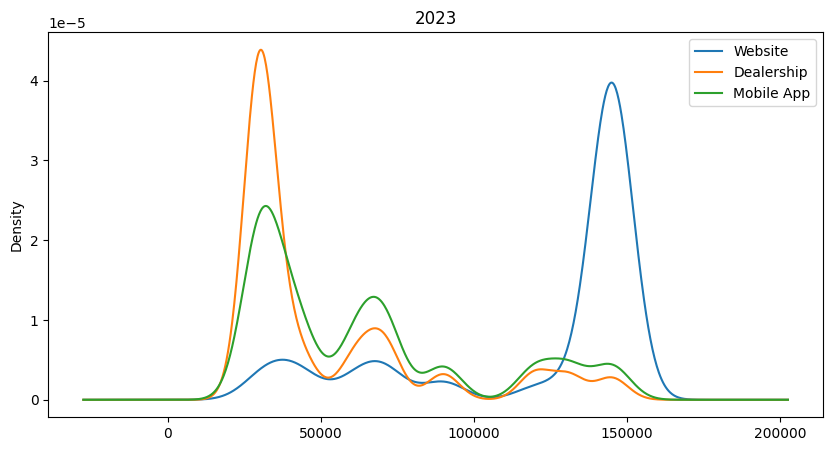

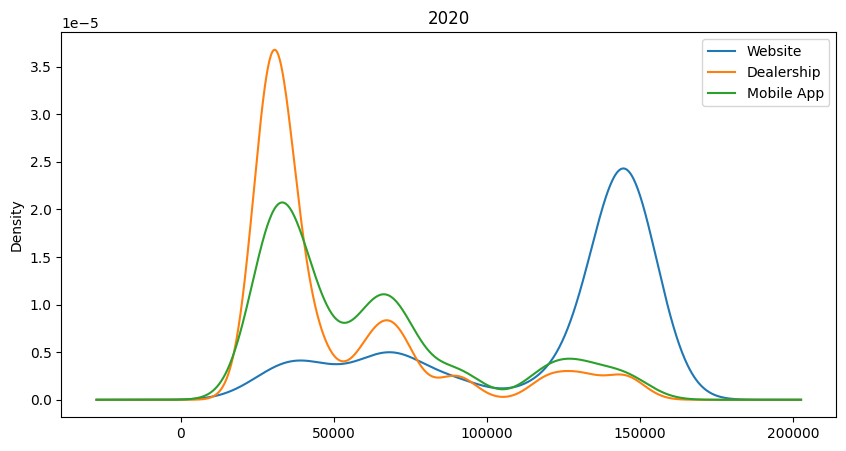

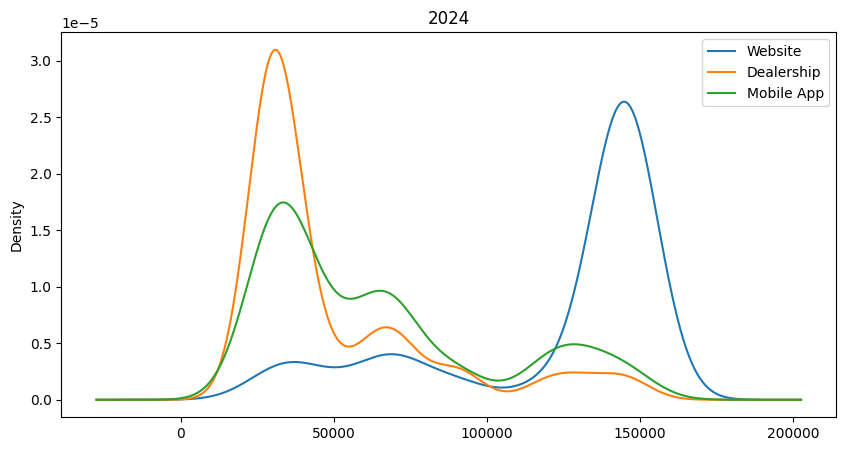

In [29]:
# plot the price distribution colored by the platform for every year
for year in sales['purchase_date'].dt.year.unique():
    plt.figure(figsize=(10,5))
    for platform in sales['platform'].unique():
        sales[(sales['platform'] == platform) & (sales['purchase_date'].dt.year == year)]['price'].plot(kind='kde', label=platform)
    plt.legend()
    plt.title(year)
    plt.show()

We can see that the most valuable cars are sold on the website, 
<br>the cheapest cars are bought at the dealership or via the mobile app, 
<br>but in the middle range the mobile app sells best. (recently the avarage customer on the app started to buy cheaper kind of cars)

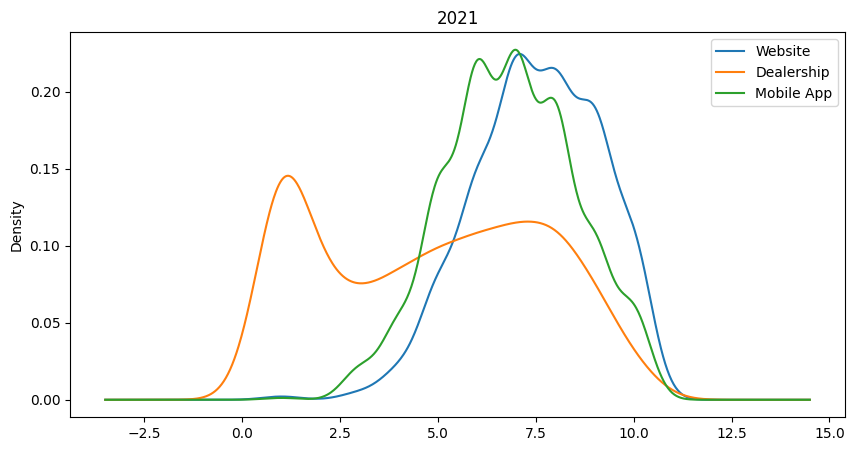

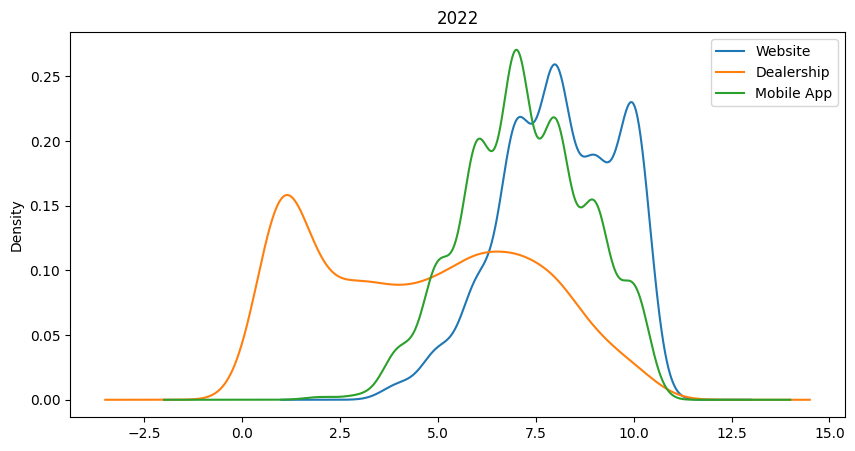

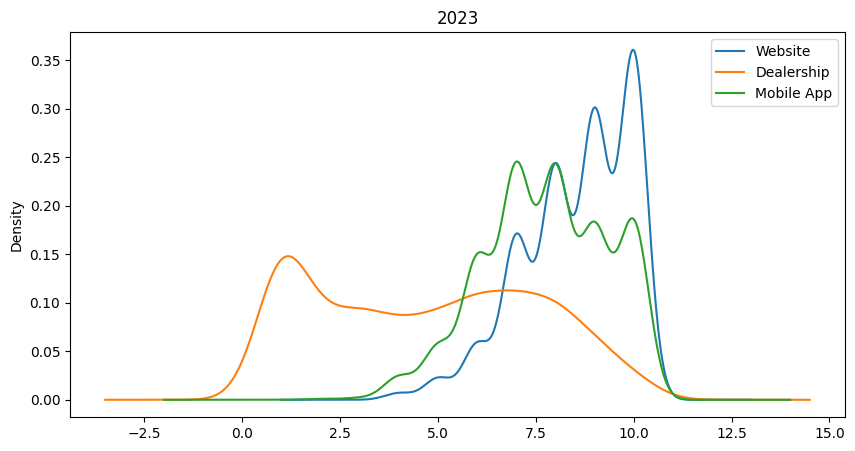

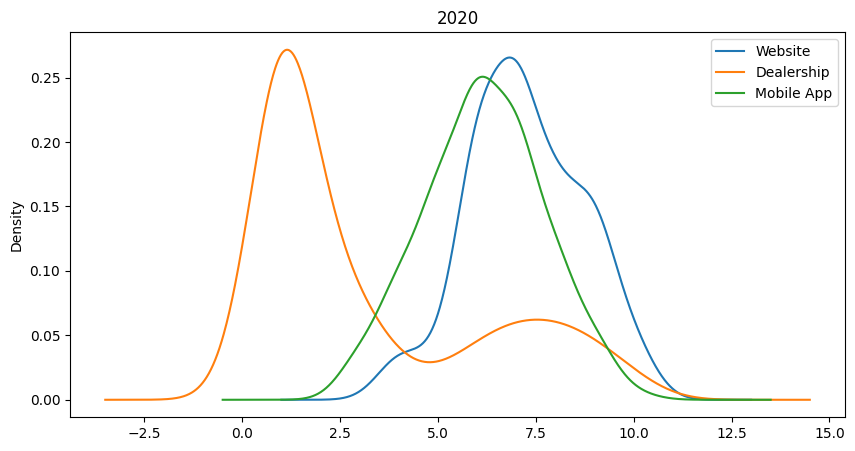

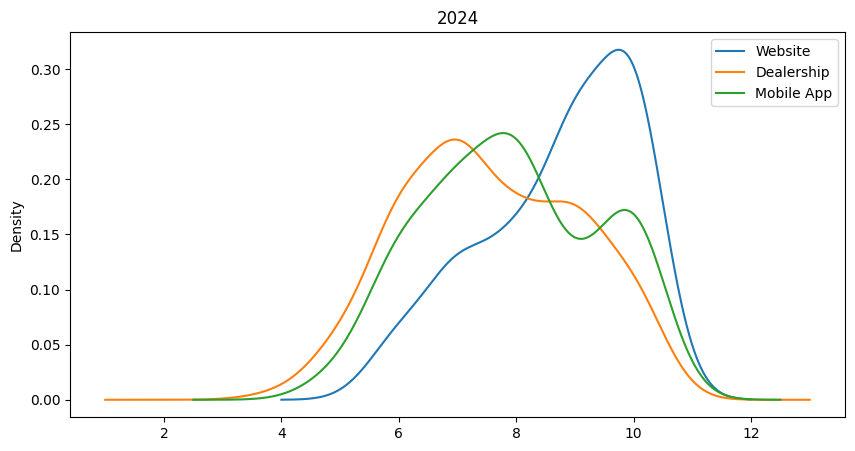

In [27]:
# plot the user_review distribution colored by the platform year after year
for year in sales['purchase_date'].dt.year.unique():
    plt.figure(figsize=(10,5))
    for platform in sales['platform'].unique():
        sales[(sales['platform'] == platform) & (sales['purchase_date'].dt.year == year)]['user_review'].plot(kind='kde', label=platform)
    plt.legend()
    plt.title(year)
    plt.show()

Here we can clearly see that the customers that use the website leave the best reviews
<br>All reviews under ‘2’ are only done at the dealership, but the graph of Jan 2024 suggest that the problem is solved

<Axes: xlabel='purchase_date'>

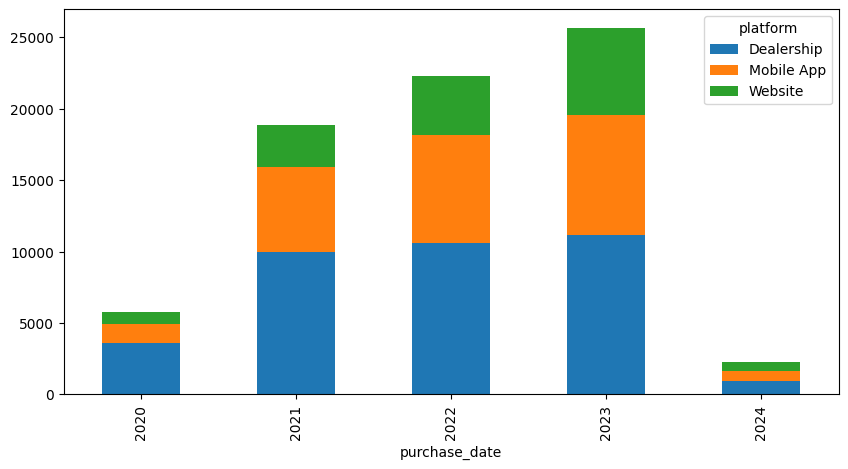

In [28]:
# to be sure let's count the number of sells for each platform for every year
sales.groupby([sales['purchase_date'].dt.year, 'platform']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

As previously demonstrated the website and the app gained a lot of popularity, without compromising the sales of the dealership (they raised too)

### Price column

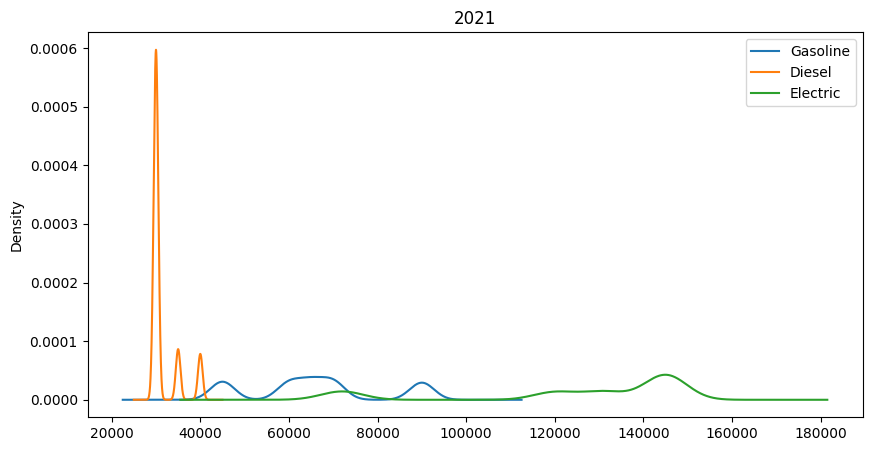

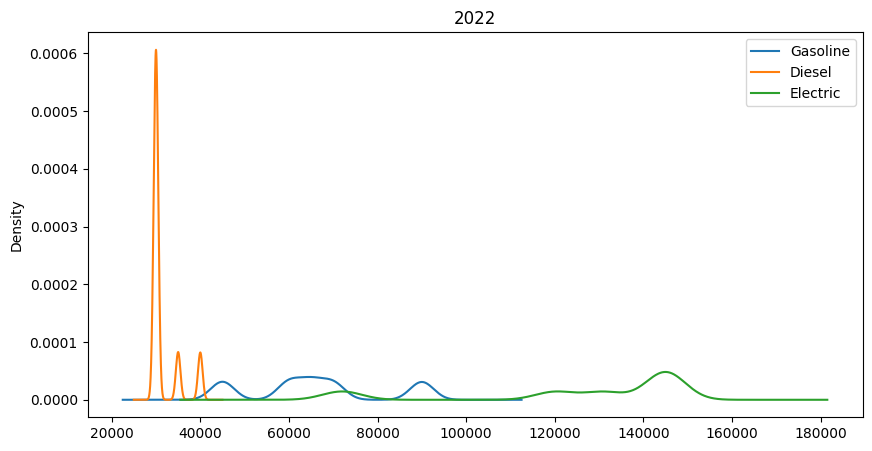

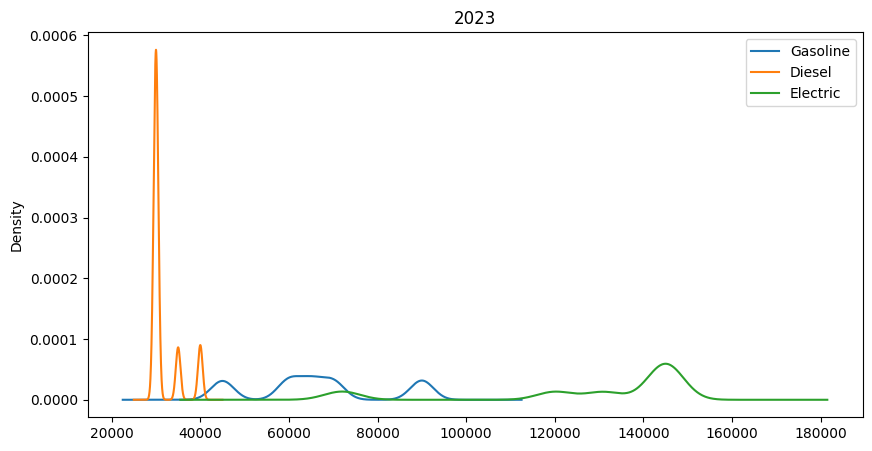

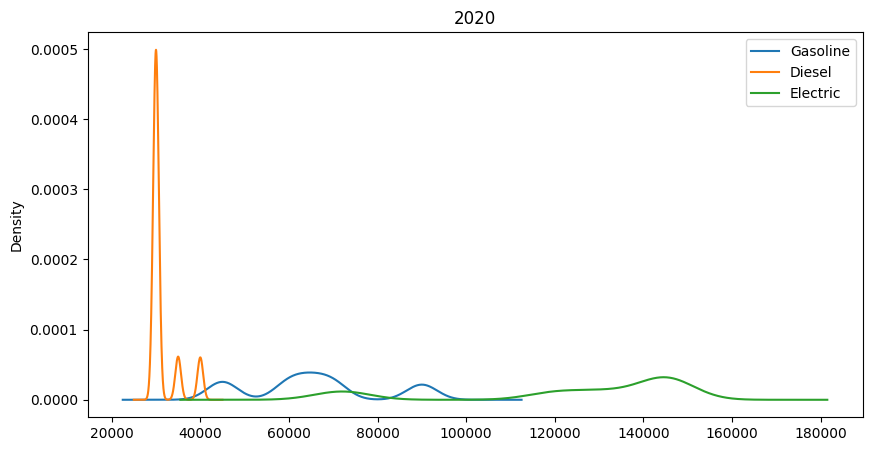

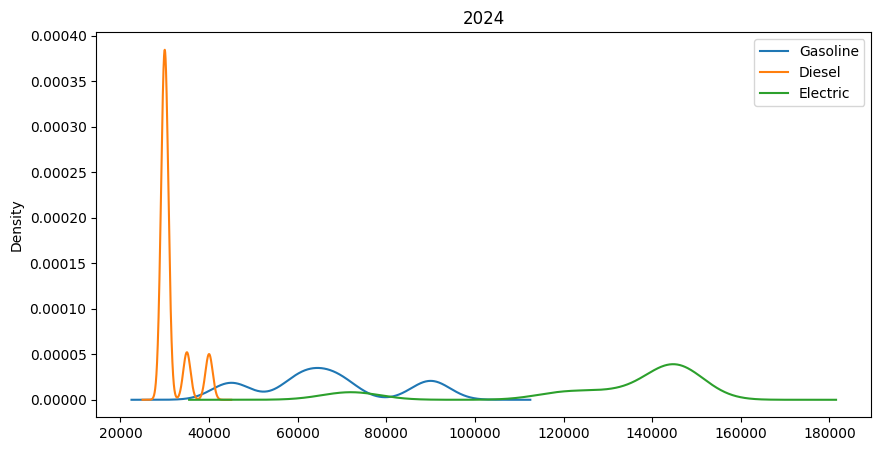

In [30]:
# plot the price distribution colored by the fuel type for every year
for year in sales['purchase_date'].dt.year.unique():
    plt.figure(figsize=(10,5))
    for fuel_type in sales['fuel_type'].unique():
        sales[(sales['fuel_type'] == fuel_type) & (sales['purchase_date'].dt.year == year)]['price'].plot(kind='kde', label=fuel_type)
    plt.legend()
    plt.title(year)
    plt.show()